In [1]:
import pandas as pd
import re
from ast import literal_eval
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
songData = pd.read_csv('songData_cleaned.csv', index_col=0)

In [5]:
all_artists = set()
artist_count = {}

for artists in songData.artists:
    try:
        artist_list = [artist.lower().replace('\u200b', '') for artist in literal_eval(artists)]

        for artist in artist_list:
            if artist in all_artists:
                artist_count[artist] += 1
            else:
                artist_count[artist] = 1
        all_artists = all_artists.union(set(artist_list))
    except:
        print('Unable to process artists: ', artists)


{'betty carter', 'saudi', 'jaxson free', 'denine', 'the platters', 'david)', 'chunky a', 'gene chandler', 'the edsels', 'counting crows', 'cheech', 'dlow', 'tommy sands', 'the flying machine', 'dj laz', 'kyjuan', 'kimbra', 'bruce springsteen', 'vin jay', 'joe budden', 'teegarden', 'frankie avalon', 'stacy lattisaw', 'sarah mclachlan', 'gesaffelstein', 'antônio carlos jobim', 'war', 'the fixx', 'meghan trainor', 'dj sammy', 'cristin milioti', 'derek and the dominos', 'mulberry lane', 'nate dogg', 'young dro', 'lipps, inc.', 'regina', 'trapp', 'nb ridaz', 'nona gaye', 'honeymoon suite', 'john mayer trio', 'men at large', 'r. kelly', 'chris cornell', 'the brand new heavies', 'rené', 'elle king', 'loose ends', 'grandmaster melle mel', 'sc static', 'dot rotten', 'the oak ridge boys', 'oingo boingo', 'dragonforce', 'eve', 'jimmy ruffin', 'epic rap battles of history', 'flume', 'monie love', 'lucas grabeel', 'vitamin c', 'mouth', 'aizat', 'bill champlin', 'meri wilson', 'alison moyet', 'chubb

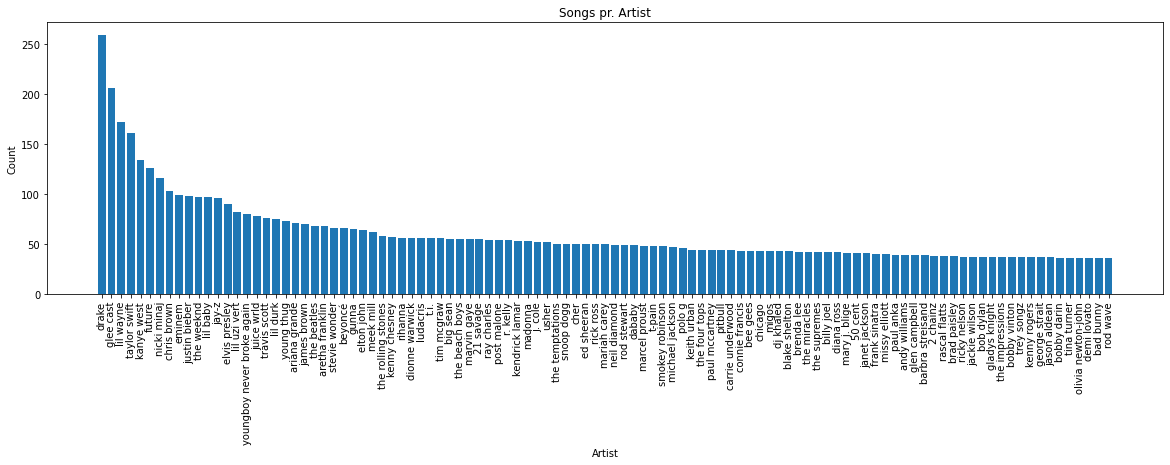

In [97]:
sorted_artists = {k: v for k, v in sorted(artist_count.items(), key=lambda item: item[1], reverse=True) if v > 35}
#for k, v in sorted_artists.items():
#    print(k + ':', v)

plt.figure(figsize=(20,5))
plt.bar(*zip(*sorted_artists.items()))
plt.xlabel('Artist')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Songs pr. Artist')
plt.show()

In [17]:
all_genres = set()
genre_count = {}

for genres in songData.genres:
    try:
        genre_list = [genre.lower().replace('\u200b', '') for genre in literal_eval(genres)]

        for genre in genre_list:
            if genre in all_genres:
                genre_count[genre] += 1
            else:
                genre_count[genre] = 1
        all_genres = all_genres.union(set(genre_list))
    except:
        print(genres)

len(all_genres)

619

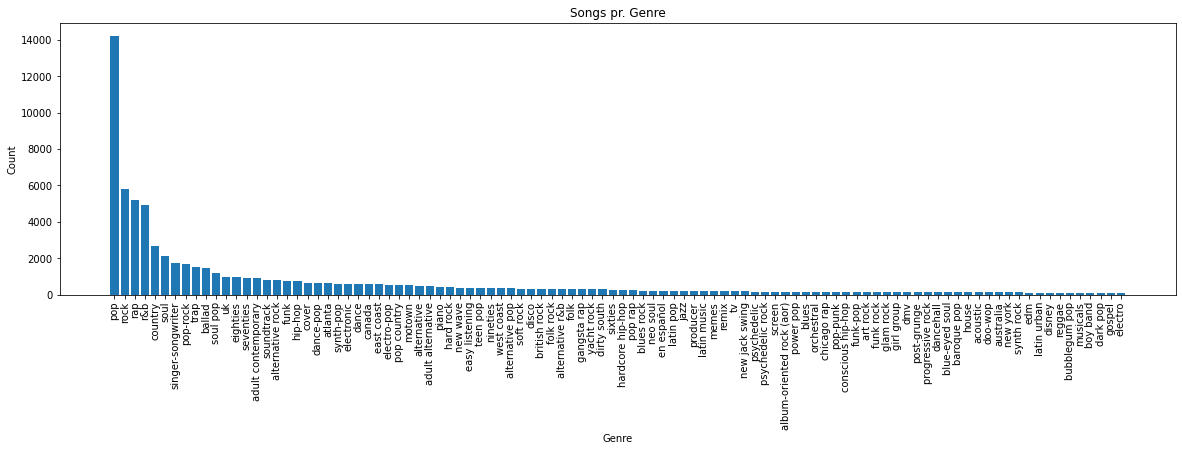

In [91]:
sorted_genres = {k: v for k, v in sorted(genre_count.items(), key=lambda item: item[1], reverse=True) if v > 100}
#for k, v in sorted_genres.items():
#    print(k + ':', v)

plt.figure(figsize=(20,5))
plt.bar(*zip(*sorted_genres.items()))
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Songs pr. Genre')
plt.show()

In [12]:
songData.head(5)

,released,artists,lyrics,genres,title
0,1957,['Marty Robbins'],El Paso Lyrics\nOut in the West Texas town of ...,['country'],El Paso
1,1960-01-04,['Frankie Avalon'],Why LyricsI'll never let you go\nWhy? Because ...,['pop'],Why
3,1959,['Johnny Preston'],Running Bear LyricsOn the bank of the river\nS...,['pop'],Running Bear
4,1960-01-04,['Freddy Cannon'],"Way Down Yonder in New Orleans LyricsWell, way...",['pop'],Way Down Yonder in New Orleans
5,1960-01-04,['Guy Mitchell'],Heartaches by the Number Lyrics\nHeartaches by...,"['country', 'cover']",Heartaches by the Number


In [14]:
list_df = pd.DataFrame(None, columns=['artists', 'genres'])

for i in songData.index.values:
    genres = [genre.lower().replace('\u200b', '') for genre in literal_eval(songData.genres[i])]
    artists= [artist.lower().replace('\u200b', '') for artist in literal_eval(songData.artists[i])]
    list_df.loc[i] = [artists, genres]

In [33]:
from datetime import datetime

In [ ]:
songData.to_pickle('songData_fixed.df')

In [51]:
songData[songData.title == 'HENTAI']

,released,artists,lyrics,genres,title
112,2022-03-16,[rosalía],"HENTAI Lyrics\n\nPa', pero mírate\nNo pienses ...","[pop, art pop, piano, en español, spanish pop,...",HENTAI


## Remove duplicate songs

In [64]:
all_songs = set()
songs_count = {}

for i, art, tit in zip(songData.index.values, songData.artists, songData.title):
    song = ', '.join(art) + ': ' + tit
    if song in all_songs:
        songs_count[song] += 1
        #songData = songData.drop(i)
    else:
        songs_count[song] = 1
    all_songs.add(song)

len(all_songs)

26039

In [65]:
sorted_songs = {k: v for k, v in sorted(songs_count.items(), key=lambda item: item[1], reverse=True) if v > 1}
for k, v in sorted_songs.items():
    print(k + ':', v)

In [67]:
songData.to_pickle('songData_noduplicates.df')

## Song distribution?

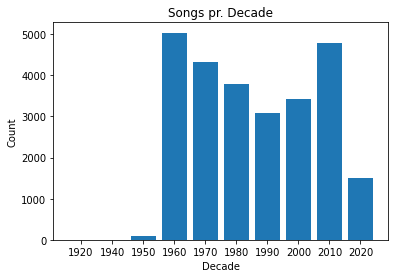

In [84]:
decade_count = defaultdict(lambda: 0)
for date in songData.released:
    year = (int(date[:4]) // 10) * 10
    decade_count[str(year)] += 1

decade_count = {k: v for k, v in sorted(decade_count.items(), key=lambda item: int(item[0])) if v > 1}

plt.bar(*zip(*decade_count.items()))
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Songs pr. Decade')
plt.show()

In [79]:
decade_count

defaultdict(<function __main__.<lambda>()>,
            {1950: 86,
             1960: 5037,
             2020: 1496,
             2010: 4780,
             1980: 3784,
             1990: 3088,
             2000: 3425,
             1970: 4330,
             1940: 6,
             1920: 2,
             1860: 1,
             1870: 1,
             1930: 1,
             1890: 1,
             20: 1})